# Modelos base(baseline)

In [2]:
import random
from random import choice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


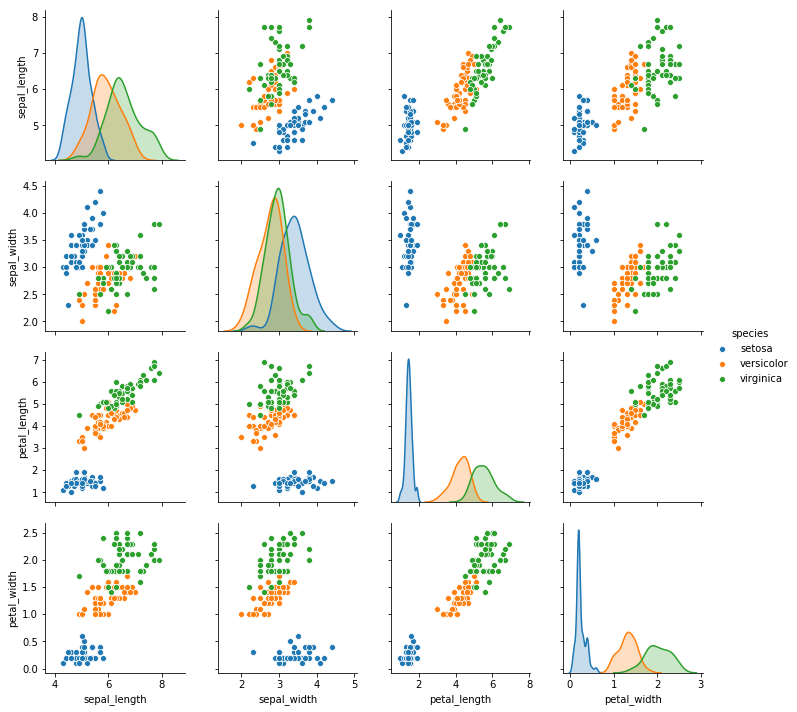

In [3]:
sns.pairplot(iris_df,hue='species')

In [4]:
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
def modelo_chango(instancia):
    return random.choice(['setosa','virginica','versicolor'])

In [6]:
instancias = iris_df.drop(columns=['species'])
iris_df['predichas']=[
    modelo_chango(instancia)
    for instancia in instancias.iterrows()
]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predichas
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,versicolor
2,4.7,3.2,1.3,0.2,setosa,versicolor
3,4.6,3.1,1.5,0.2,setosa,versicolor
4,5.0,3.6,1.4,0.2,setosa,setosa


In [7]:
100*np.mean(iris_df['species'] == iris_df['predichas'])

30.666666666666664

In [8]:
def modelo_a_ojo(instancia):
    petal_length = instancia['petal_length']
    if petal_length <= 2.5:
        return 'setosa'
    elif petal_length <= 4.6:
        return 'versicolor'
    elif petal_length <= 7:
        return 'virginica'
    else:
        return 'No existe la planta'

iris_df['predichas'] = [
    modelo_a_ojo(renglon)
    for indice,renglon in instancias.iterrows()
]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predichas
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [9]:
100*np.mean(iris_df['species'] == iris_df['predichas'])

92.0

In [10]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
nhanes_df = pd.read_csv("Kaggle/nhanes.csv")

In [12]:
nhanes_df.corr()

,Gender,Age,Weight,Height,Leg_Length,Arm_Length,Arm_circum,Waist
Gender,1.000000,0.006785,0.275742,0.669364,0.503176,0.558865,0.159828,0.139936
Age,0.006785,1.000000,0.017480,-0.105107,-0.268362,0.053667,0.009340,0.227538
Weight,0.275742,0.017480,1.000000,0.442543,0.237047,0.584044,0.859518,0.891869
Height,0.669364,-0.105107,0.442543,1.000000,0.745212,0.799729,0.212407,0.181536
Leg_Length,0.503176,-0.268362,0.237047,0.745212,1.000000,0.612864,0.075998,-0.028937
Arm_Length,0.558865,0.053667,0.584044,0.799729,0.612864,1.000000,0.434724,0.401728
Arm_circum,0.159828,0.009340,0.859518,0.212407,0.075998,0.434724,1.000000,0.820541
Waist,0.139936,0.227538,0.891869,0.181536,-0.028937,0.401728,0.820541,1.000000


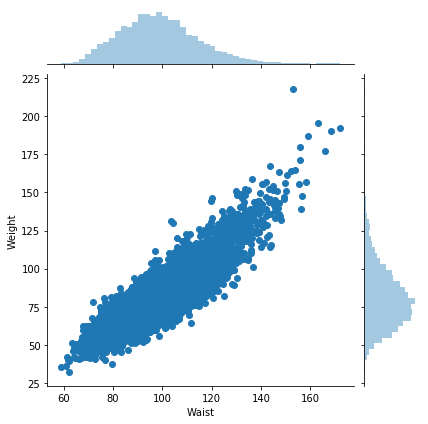

In [13]:
sns.jointplot(data=nhanes_df,x='Waist',y='Weight')

LinAlgError: SVD did not converge in Linear Least Squares

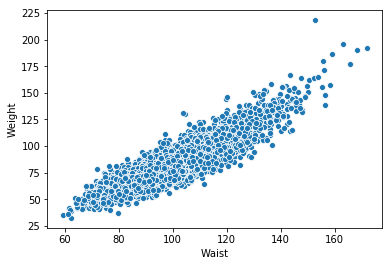

In [14]:
sns.scatterplot(data=nhanes_df,x='Waist',y='Weight')
df = nhanes_df.sample(400)
np.polyfit(x=(list(nhanes_df['Waist'])),y=(list(nhanes_df['Weight'])),deg=1)

In [ ]:
x_i = np.linspace(0,100)
y_i = (.5*x_i-0.1 + np.random.normal(0,5,size=len(x_i)))
y_i

In [ ]:
a,b = np.min(x_i)-1,np.max(x_i)+1
X = np.linspace(a,b)


In [15]:
list(zip(random.choices(list(zip(x_i,y_i)), k=n)))

NameError: name 'x_i' is not defined

In [16]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [17]:
import antigravity

In [18]:
n=len(x_i)
muestra_coef=[]
for k in range(400):
    muestra = random.choices(list(zip(x_i,y_i)), k=n)
    x_muestra,y_muestra = zip(*muestra)
    muestra_coef.append(np.polyfit(x_muestra,y_muestra,deg=1))

fig,ax=plt.subplots()

for coef in muestra_coef:
    p = np.poly1d(coef)
    plt.plot([0,100],[p[0],p[100]],alpha=.1,color='green')
    
ax.plot(x_i,y_i,'.')
ax.plot(X,polinomio(X),color='red')

NameError: name 'x_i' is not defined

In [ ]:
sns.regplot(x_i,y_i)

In [19]:
x = np.linspace(0,1)
y = np.linspace(0,1)
z = 2*x -3*y +1

In [20]:
X = np.array([[1,1],[1,2],[2,2],[2,3]])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [21]:
# y = 1*x_0 +2*x_1 +3
y = np.dot(X,np.array([1,2]))+3+np.random.normal(size=len(X))
y

array([ 5.18592674,  7.34186595,  9.35039187, 12.63523947])

In [22]:
reg = LinearRegression().fit(X,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
reg.score(X,y)

0.9894086041215963

In [24]:
reg.coef_

array([2.00852592, 2.7203934 ])

In [25]:
reg.intercept_

0.17478031574198205

In [26]:
reg.predict(np.array([[3,5]]))

array([19.80232511])

In [80]:
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [81]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [82]:
class Bunch:
    def __init__(self,**kwargs):
        self.__dict__=kwargs

In [83]:
b = Bunch(x=0,y=1)
b

In [84]:
b.x=0
b.y=1

In [85]:
class A:
    pass

In [86]:
a=A()
a.x='Hola'
a.y=1

In [87]:
a.__dict__

{'x': 'Hola', 'y': 1}

In [88]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [89]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [90]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [91]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [92]:
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)

In [93]:
boston_df['MEDV']=boston.target

In [94]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [95]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [96]:
linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
regresor = linear_model.LinearRegression()

In [98]:
regresor.fit(boston_df.drop(columns=['MEDV']).values,boston_df['MEDV'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
regresor.intercept_

36.45948838509015

In [100]:
regresor.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [101]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10801135783679423,
 'ZN': 0.04642045836688117,
 'INDUS': 0.020558626367069507,
 'CHAS': 2.6867338193449415,
 'NOX': -17.766611228299926,
 'RM': 3.809865206809223,
 'AGE': 0.0006922246403368467,
 'DIS': -1.4755668456002524,
 'RAD': 0.30604947898516904,
 'TAX': -0.012334593916573685,
 'PTRATIO': -0.9527472317072904,
 'B': 0.009311683273793581,
 'LSTAT': -0.5247583778554906}

In [102]:
regresorz = linear_model.LinearRegression(normalize=True)

In [103]:
regresorz.fit(boston_df.drop(columns=['MEDV']).values,boston_df['MEDV'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [104]:
dict(zip(boston.feature_names,regresor.coef_))

{'CRIM': -0.10801135783679423,
 'ZN': 0.04642045836688117,
 'INDUS': 0.020558626367069507,
 'CHAS': 2.6867338193449415,
 'NOX': -17.766611228299926,
 'RM': 3.809865206809223,
 'AGE': 0.0006922246403368467,
 'DIS': -1.4755668456002524,
 'RAD': 0.30604947898516904,
 'TAX': -0.012334593916573685,
 'PTRATIO': -0.9527472317072904,
 'B': 0.009311683273793581,
 'LSTAT': -0.5247583778554906}

In [105]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(boston.data,boston.target,test_size=.2)

In [106]:
regresor=linear_model.LinearRegression(normalize=True)
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [107]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l**0.5

5.529252085704471

In [108]:
boston_df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [182]:
tabla = pd.read_csv('Datos/TR_PERSONA17.CSV',encoding='latin1')
tabla.head()

,ID_VIV,ID_PERSONA,ENT,NOM_ENT,MUN,NOM_MUN,LOC50K,NOM_LOC,COBERTURA,ESTRATO,...,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,HIJOS_SOBREVIV,FECHA_NAC_M,FECHA_NAC_A,SOBREVIVENCIA,EDAD_MORIR_D,EDAD_MORIR_M,EDAD_MORIR_A,TAMLOC
0,170010000001,17001000000101,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,170010000002,17001000000201,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-06,...,7.0,0.0,7.0,8.0,1978.0,1.0,NaN,NaN,NaN,1
2,170010000003,17001000000303,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,170010000003,17001000000301,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,170010000003,17001000000302,17,Morelos,1,Amacuzac,0,Localidad de menos de 50 mil habitantes,2,17-001-08,...,1.0,0.0,1.0,10.0,2012.0,1.0,NaN,NaN,NaN,2


In [183]:
tabla.columns

Index(['ID_VIV', 'ID_PERSONA', 'ENT', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC50K',
       'NOM_LOC', 'COBERTURA', 'ESTRATO', 'UPM', 'FACTOR', 'NUMPER', 'SEXO',
       'EDAD', 'PARENT', 'PARENT_OTRO_C', 'IDENT_MADRE', 'IDENT_PADRE',
       'SERSALUD', 'AFRODES', 'ACTA_NAC', 'DHSERSAL1', 'DHSERSAL2',
       'PERTE_INDIGENA', 'ENT_PAIS_NAC', 'NACIONALIDAD', 'HLENGUA',
       'QDIALECT_C', 'QDIALECT_INALI', 'HESPANOL', 'ELENGUA', 'ASISTEN',
       'MUN_ASI', 'NOM_MUN_ASI', 'ENT_PAIS_ASI', 'TIE_TRASLADO_ESCU',
       'MED_TRASLADO_ESC1', 'MED_TRASLADO_ESC2', 'MED_TRASLADO_ESC3',
       'ESCOLARI', 'NIVACAD', 'ALFABET', 'ESCOACUM', 'MUN_RES10',
       'NOM_MUN_RES10', 'ENT_PAIS_RES10', 'SITUA_CONYUGAL', 'IDENT_PAREJA',
       'CONACT', 'OCUPACION_C', 'SITUACION_TRAB', 'AGUINALDO', 'VACACIONES',
       'SERVICIO_MEDICO', 'UTILIDADES', 'INCAP_SUELDO', 'SAR_AFORE',
       'CREDITO_VIVIENDA', 'INGTRMEN', 'ACTIVIDADES_C', 'MUN_TRAB',
       'NOM_MUN_TRAB', 'ENT_PAIS_TRAB', 'TIE_TRASLADO_TRAB',
       '

In [184]:
tabla_pr = tabla[['SEXO','EDAD','INGTRMEN','ESCOACUM']]
tabla_pr = tabla_pr.dropna()

In [185]:
tabla_pr.replace({'SEXO' : 3}, 0, inplace=True)
tabla_pr.head()

,SEXO,EDAD,INGTRMEN,ESCOACUM
0,1,30,10000.0,16.0
3,1,23,4286.0,9.0
4,0,24,4286.0,6.0
9,0,47,12857.0,9.0
11,1,41,857.0,9.0


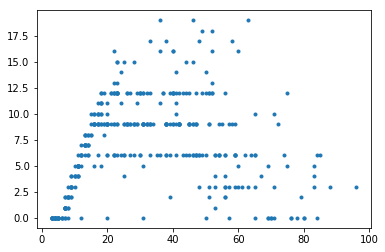

In [186]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['ESCOACUM'], marker='.', linestyle='none')

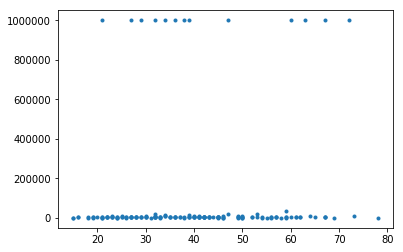

In [187]:
muestra = tabla.sample(400)
plt.plot(muestra['EDAD'], muestra['INGTRMEN'], marker='.', linestyle='none')

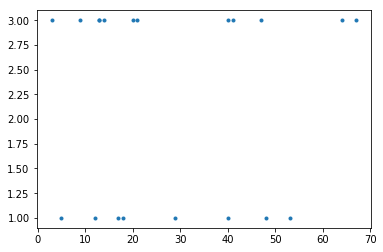

In [188]:
muestra = tabla.sample(20)
plt.plot(muestra['EDAD'], muestra['SEXO'], marker='.', linestyle='none')

In [189]:
tabla_pr1= tabla_pr[(tabla_pr['INGTRMEN']>0)&(tabla_pr['EDAD']<=100)
                    &(tabla_pr['INGTRMEN']<999_999)&(tabla_pr['ESCOACUM']>0)
                    &(tabla_pr['ESCOACUM']<99)]

In [190]:
tabla_pr1.describe()

,SEXO,EDAD,INGTRMEN,ESCOACUM
count,120503.000000,120503.000000,120503.000000,120503.000000
mean,0.639461,37.732480,4899.306109,9.734961
std,0.480159,13.498149,5746.262155,3.930578
min,0.000000,12.000000,8.000000,1.000000
25%,0.000000,27.000000,2571.000000,6.000000
50%,1.000000,36.000000,4000.000000,9.000000
75%,1.000000,47.000000,5800.000000,12.000000
max,1.000000,99.000000,999998.000000,24.000000


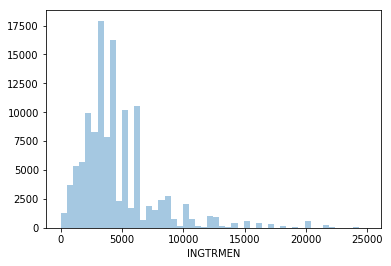

In [191]:
sns.distplot(tabla_pr1['INGTRMEN'][tabla_pr1['INGTRMEN']<25000],kde=False)

In [192]:
tabla_pr1['LOGINGTRMEN']=np.log10(tabla_pr1['INGTRMEN'])
tabla_pr1.LOGINGTRMEN.describe()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    120503.000000
mean          3.579215
std           0.307518
min           0.903090
25%           3.410102
50%           3.602060
75%           3.763428
max           5.999999
Name: LOGINGTRMEN, dtype: float64

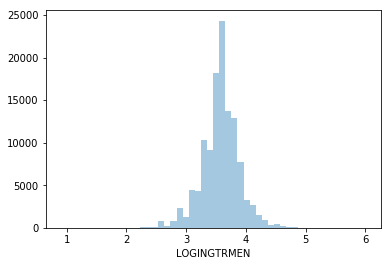

In [193]:
sns.distplot(tabla_pr1.LOGINGTRMEN,kde=False)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


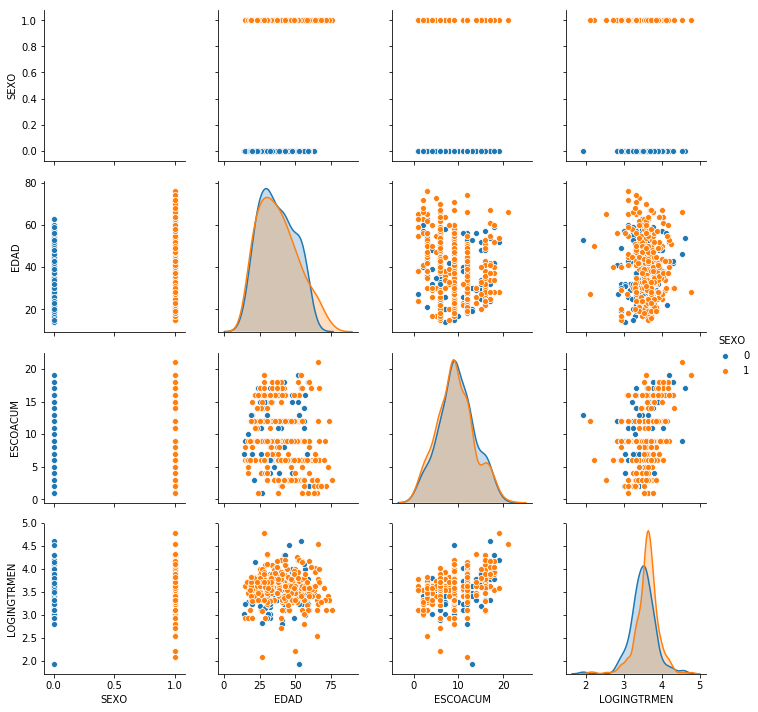

In [194]:
muestra=tabla_pr1.sample(500).drop(columns='INGTRMEN')
sns.pairplot(muestra,hue='SEXO')

In [195]:
muestra.corr()

,SEXO,EDAD,ESCOACUM,LOGINGTRMEN
SEXO,1.000000,0.026764,-0.042077,0.167264
EDAD,0.026764,1.000000,-0.233329,-0.015385
ESCOACUM,-0.042077,-0.233329,1.000000,0.353398
LOGINGTRMEN,0.167264,-0.015385,0.353398,1.000000


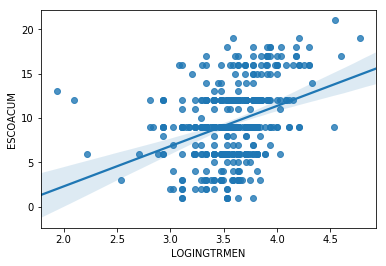

In [196]:
sns.regplot(muestra['LOGINGTRMEN'],muestra['ESCOACUM'])

In [200]:
muestra.drop(['SEXO'], axis=1)
tabla_pr1.drop(['SEXO'], axis=1)
regresor = linear_model.LinearRegression(normalize=True)

In [201]:
?linear_model.LinearRegression

Init signature:
linear_model.LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int or None, optional (default=None)
    The number of jobs

In [202]:
regresor.fit(muestra.drop(columns=['LOGINGTRMEN']).values,muestra['LOGINGTRMEN'].values)
dict(zip(muestra.columns,regresor.coef_))

{'SEXO': 0.11855698143559472,
 'EDAD': 0.0015851929631305673,
 'ESCOACUM': 0.029373704214009432}

In [203]:
?regresor.fit

Signature: regresor.fit(X, y, sample_weight=None)
Docstring:
Fit linear model.

Parameters
----------
X : array-like or sparse matrix, shape (n_samples, n_features)
    Training data

y : array_like, shape (n_samples, n_targets)
    Target values. Will be cast to X's dtype if necessary

sample_weight : numpy array of shape [n_samples]
    Individual weights for each sample

    .. versionadded:: 0.17
       parameter *sample_weight* support to LinearRegression.

Returns
-------
self : returns an instance of self.
File:      c:\users\admin\anaconda3\lib\site-packages\sklearn\linear_model\base.py
Type:      method


In [204]:
10**regresor.intercept_

1457.0209756381132

In [205]:
?regresor.intercept_

Type:            float64
String form:     3.163465804026898
File:            c:\users\admin\anaconda3\lib\site-packages\numpy\__init__.py
Docstring:       <no docstring>
Class docstring:
Double-precision floating-point number type, compatible with Python `float`
and C ``double``.
Character code: ``'d'``.
Canonical name: ``np.double``.
Alias: ``np.float_``.
Alias *on this platform*: ``np.float64``: 64-bit precision floating-point number type: sign bit, 11 bits exponent, 52 bits mantissa.


In [ ]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l

In [220]:
?regresor.predict

Signature: regresor.predict(X)
Docstring:
Predict using the linear model

Parameters
----------
X : array_like or sparse matrix, shape (n_samples, n_features)
    Samples.

Returns
-------
C : array, shape (n_samples,)
    Returns predicted values.
File:      c:\users\admin\anaconda3\lib\site-packages\sklearn\linear_model\base.py
Type:      method


In [213]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(muestra.drop(['LOGINGTRMEN'], axis=1),muestra['LOGINGTRMEN'],test_size=.2)

In [214]:
?model_selection.train_test_split

Signature: model_selection.train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int or None, optional (default=0.25)
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` i

In [215]:
y_pred = regresor.predict(X_test)
l = metrics.mean_squared_error(y_test,y_pred)
l**0.5

0.29756917049319487

In [216]:
regresor=linear_model.LinearRegression()
regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [217]:
regresor.intercept_

3.178425864590643

In [218]:
regresor.coef_

array([0.12116568, 0.00161198, 0.02696183])

In [219]:
y_pred=regresor.predict(X_test)
l=metrics.mean_squared_error(y_test,y_pred)
l

0.08966389144100584